# Cardiotocography : A Machine Learning Project

## by Hana Shah

<a id="intro"></a>
# 1. Introduction

This is a machine learning project which focuses on a cardiotocogram dataset to predict the state of patients' fetus using supervised machine learning models such as decision tree and k-Nearest neighbors. This project uses several Python libraries such as:

- Pandas (for Data Acquisition)
- Numpy 
- MatPlotlib & Seaborn (for Data Visualization)
- sklearn (for Feature Selection and Model Building)

# Table of Contents

1. [Introduction](#intro)
2. [Data Acquisition](#dataq)
3. [Data Cleaning](#datac)
4. [Data Visualization](#datav)
5. [Feature Selection](#featuresel)
6. [Model Training](#modeltrain)
7. [Model Prediction](#modelpred)
8. [Hyperparameter Tuning](#hyperparam)
9. [Conclusion](#conclude)

<a id="dataq"></a>
# 2. Data Acquisition

#### Importing Libraries
Importing all libraries needed. More libraries will be imported if required.

In [1]:
# Import the standard modules
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the file
cardio = pd.read_csv("C:/Users/Hana/Downloads/Cardiotocography-main/ctg.csv")
cardio

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0
2125,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# getting the columns of the dataset
columns = list(cardio.columns)
columns

['LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'CLASS',
 'NSP']

In [4]:
# check datatype in each column, all data types are correct
print("Column datatypes: ")
print(cardio.dtypes)

Column datatypes: 
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
CLASS       float64
NSP         float64
dtype: object


In [5]:
# cheking the number of rows and columns
cardio.shape

(2129, 23)

In [6]:
# Display the statistics of the data
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0
DS,2128.0,0.003759,0.061213,0.0,0.0,0.0,0.0,1.0


In [7]:
# Display the information of the dataset
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

<a id="datac"></a>
# 3. Data Cleaning
Based on the original dataset, there are three rows that have empty cells. Since each row has more than one empty cell, the missing values were handled by deleting the rows.

In [8]:
# check the number of missing values in each column
cardio.isna().sum()

LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [9]:
# drop the bottom three rows that contain the missing values
cardio = cardio.drop(labels=[2126,2127,2128], axis=0)
cardio

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0,2.0


In [10]:
# check again the number of missing values in each column
cardio.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [11]:
# view number of duplicate data, since this is structured data, the duplicate inputs result in some distribution across the output 
# and thus that distribution must be retained so the duplicates will not be removed.
print(cardio.duplicated().sum())

12


<a id="datav"></a>
# 4. Data Visualization

In [12]:
# Import the necessary libraries
import seaborn as sns
from matplotlib import pyplot as plt

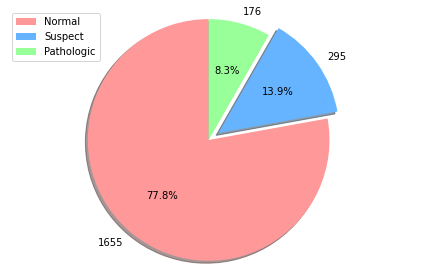

In [13]:
# Display the distribution of the data
value = np.array(cardio['NSP'].value_counts())
label = ["Normal", "Suspect", "Pathologic"]
sizes = np.array(cardio['NSP'].value_counts())
explode = (0, 0.1, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

<a id="featuresel"></a>
# 5. Feature Selection

Feature selection is to select a subset of relevant features for building the predictive models. The feature selection method used is ANOVA because we're dealing with numerical input variable and categorical output variable. Also, this method is used because this is a multiclass classification problem.

In [14]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [15]:
# Set the input and response variable
X = cardio.iloc[:, 0:22] 
y = cardio.iloc[:,-1]

### Feature Selection Using Anova (Analysis Of Variance) or F-Test

In [17]:
# anova f-test feature selection for numerical data
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
features_score = pd.DataFrame(fs.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
feature_score.columns = ["Input_Features","Score"]
print(feature_score.nlargest(10,columns="Score"))

   Input_Features       Score
21          CLASS  738.596837
10             DP  467.882575
4            ASTV  281.835352
17           Mean  254.275705
6            ALTV  245.337451
16           Mode  230.937845
18         Median  211.995039
1              AC  130.720237
19       Variance  124.450809
5            MSTV   98.517580


The 10 best features obtained are CLASS, DP, ASTV, Mean, ALTV, Mode, Median, AC, Variance, MSTV.

<a id="modeltrain"></a>
# 6. Model Training

In [18]:
# X value and y value
y = cardio['NSP']
X = cardio[['CLASS', 'DP', 'ASTV', 'Mean', 'ALTV', 'Mode', 'Median', 'AC', 'Variance', 'MSTV']]

In [20]:
#Split the dataset into training, testing and validation sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1700, 10)
(426, 10)
(426, 10)


### k-Nearest Neighbors

In [45]:
# Fitting KNN into the training set and test set
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') 
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Model Validation
Validation set is used for model validation.

In [46]:
# Import the libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model_knn.predict(x_val)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("Classification Report: ")
print(classification_report(y_val, y_pred))
print("Accuracy:")
print(accuracy_score(y_val, y_pred))

Confusion Matrix:
[[314   8   4]
 [ 14  41   3]
 [  2   3  37]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       326
         2.0       0.79      0.71      0.75        58
         3.0       0.84      0.88      0.86        42

    accuracy                           0.92       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.92      0.92      0.92       426

Accuracy:
0.92018779342723


### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, max_features = 'auto',
                       min_samples_split = 7, random_state = 0) 
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_split=7, random_state=0)

#### Model Validation

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

y_pred = model_dt.predict(x_val)

# print results
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("Classification Report: ")
print(classification_report(y_val, y_pred))
print("Accuracy:")
print(accuracy_score(y_val, y_pred))

Confusion Matrix:
[[323   3   0]
 [  7  51   0]
 [  0   0  42]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       326
         2.0       0.94      0.88      0.91        58
         3.0       1.00      1.00      1.00        42

    accuracy                           0.98       426
   macro avg       0.97      0.96      0.97       426
weighted avg       0.98      0.98      0.98       426

Accuracy:
0.9765258215962441


<a id="modelpred"></a>
# 7. Model Prediction
Test set is used for prediction.

### k-Nearest Neighbors

In [47]:
y_pred_knn = model_knn.predict(x_test)

In [48]:
# print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[314   8   4]
 [ 14  41   3]
 [  2   3  37]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       326
         2.0       0.79      0.71      0.75        58
         3.0       0.84      0.88      0.86        42

    accuracy                           0.92       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.92      0.92      0.92       426

Accuracy:
0.92018779342723


### Decision Tree

In [51]:
y_pred_dt = model_dt.predict(x_test)

In [52]:
# print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report: ")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_dt))

Confusion Matrix:
[[323   3   0]
 [  7  51   0]
 [  0   0  42]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       326
         2.0       0.94      0.88      0.91        58
         3.0       1.00      1.00      1.00        42

    accuracy                           0.98       426
   macro avg       0.97      0.96      0.97       426
weighted avg       0.98      0.98      0.98       426

Accuracy:
0.9765258215962441


<a id="hyperparam"></a>
# 8. Hyperparameter Tuning
Let's try increasing the accuracy of the models by tuning the hyperparameters. The hyperparameters are tuned using GridSearchCV.

### GridSearchCV

In [38]:
# Select a set of parameters that gives optimal result
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

depths = np.arange(5, 20, 1)
min_split = np.arange(2, 8, 1)
max_iter = np.arange(100, 500, 50)
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state = 0),
        'params' : {
            'max_depth' : depths
              , 'criterion' : ['gini', 'entropy']
              , 'max_features' : ['auto', 'sqrt', 'log2']
              , 'min_samples_split' : min_split
        }  
    },

    'kN_Neighbors' : {
        'model': KNeighborsClassifier(n_neighbors=5),
        'params': {
            'weights': ['uniform', 'distance'],
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],        
        }
    }
}

In [39]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        #'best_index': clf.best_index_
    })
    
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [40]:
df

,model,best_score,best_params
0,decision_tree,0.979412,"{'criterion': 'entropy', 'max_depth': 12, 'max..."
1,kN_Neighbors,0.945882,"{'n_neighbors': 1, 'weights': 'uniform'}"


In [44]:
print('Best hyperparameters for decision tree:')
print(df['best_params'][0])
print('Best hyperparameters for k-nearest neighbors:')
print(df['best_params'][1])

Best hyperparameters for decision tree:
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 7}
Best hyperparameters for k-nearest neighbors:
{'n_neighbors': 1, 'weights': 'uniform'}


After obtaining the best hyperparameters, train the model again and see if the accuracy increases.

<a id="conclude"></a>
# 9. Conclusion

Conclusively, the best machine learning model to predict the state of fetus in patients based on the cardiotograms is the decision tree model as it has a higher accuracy compared to other models.